# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project 1: Market Basket analysis

## Learning Objectives

At the end of the experiment, you will be able to:

* extract summary level insight from a given dataset

* Integrate the data and identify the underlying pattern or structure

* understand the fundamentals of market basket analysis

* construct "rules" that provide concrete recommendations for businesses

## Dataset

The dataset chosen for this mini project is **Instacart Dataset**. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users. For each user, there are orders between 4 and 100, with the sequence of products purchased in each order. The dataset also includes the products in each order, the time of day and day of week of each order, the name and aisle/department of each product, which are stored across various files.

## Problem Statement


Extract association rules and find groups of frequently purchased items from a large-scale grocery orders dataset.

## Grading = 10 Points

#### Import required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## **Stage 1**: Data Wrangling

We have five different files:

    - orders.csv
    - order_products__train.csv
    - products.csv
    - aisles.csv
    - departments.csv

These files contain the neccesary data to solve the problem. Load all the files correctly, after observing the header level details, data records etc

**Hint:** Use `read_csv` from pandas

In [2]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/Instacart.zip
!unzip -qq Instacart.zip

### Load the data

Load all the given datasets

In [4]:
# YOUR CODE HERE
# Load the datasets
orders = pd.read_csv('/content/Instacart/orders.csv')
order_products_train = pd.read_csv('/content/Instacart/order_products__train.csv')
products = pd.read_csv('/content/Instacart/products.csv')
aisles = pd.read_csv('/content/Instacart/aisles.csv')
departments = pd.read_csv('/content/Instacart/departments.csv')

In [5]:
print("Orders DataFrame:")
print(orders.head())
print("\nOrder Products (Train) DataFrame:")
print(order_products_train.head())
print("\nProducts DataFrame:")
print(products.head())
print("\nAisles DataFrame:")
print(aisles.head())
print("\nDepartments DataFrame:")
print(departments.head())

Orders DataFrame:
   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  

Order Products (Train) DataFrame:
   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5    

In [6]:
#Get information about each DataFrame, including the data types and number of non-null values.
print("Orders DataFrame Info:")
orders.info()
print("\nOrder Products (Train) DataFrame Info:")
order_products_train.info()
print("\nProducts DataFrame Info:")
products.info()
print("\nAisles DataFrame Info:")
aisles.info()
print("\nDepartments DataFrame Info:")
departments.info()

Orders DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB

Order Products (Train) DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usag

In [ ]:
#The days_since_prior_order column has missing values for orders that are the first order for a user. A suitable way to handle this is to fill the missing values with 0

In [7]:
orders.fillna({'days_since_prior_order': 0}, inplace=True)

### Data Integration (1 point)

As the required data is present in different files, we need to integrate all the five to make single dataframe/dataset. For that purpose, use the unique identifier provided in all the dataframes so that it can be used to map the data in different files correctly.

**Example:** `product_id` is available in both `products` dataframe and `order_products__train` dataframe, we can merge these two into a single dataframe based on `product_id`

**Hint:** [pd.merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

In [8]:
# YOUR CODE HERE
# Merge order_products_train with orders
order_products_merged = pd.merge(order_products_train, orders, on='order_id', how='inner')

# Merge the result with products
order_products_merged = pd.merge(order_products_merged, products, on='product_id', how='inner')

# Merge the result with aisles
order_products_merged = pd.merge(order_products_merged, aisles, on='aisle_id', how='inner')

# Merge the result with departments
order_products_merged = pd.merge(order_products_merged, departments, on='department_id', how='inner')

print("Merged DataFrame:")
print(order_products_merged.head())

Merged DataFrame:
   order_id  product_id  add_to_cart_order  reordered  user_id eval_set  \
0         1       49302                  1          1   112108    train   
1         1       11109                  2          1   112108    train   
2         1       10246                  3          0   112108    train   
3         1       49683                  4          0   112108    train   
4         1       43633                  5          1   112108    train   

   order_number  order_dow  order_hour_of_day  days_since_prior_order  \
0             4          4                 10                     9.0   
1             4          4                 10                     9.0   
2             4          4                 10                     9.0   
3             4          4                 10                     9.0   
4             4          4                 10                     9.0   

                                    product_name  aisle_id  department_id  \
0              

### Understanding relationships and new insights from the data (3 points)

1.  How many times was each product ordered?

    **Hint:** group orders by product
    

2.  Find the number of orders per department and visualize using an appropriate plot


3.  On which day of the week do customers tend to buy more groceries? Which are the peak hours
of shopping?

  * Find the frequency of orders on week days using an appropriate plot
  * Find the frequency of orders during hours of the day using an appropriate plot?
  

4. Find the ratio of Re-ordered and Not Re-ordered products and visualize it

5. Plot the heatmap of Re-order ratio of the Day of week vs Hour of day

In [11]:
order_products_merged.shape

(1384617, 15)

In [12]:
print("Count of unique product_id:", order_products_merged['product_id'].nunique())

Count of unique product_id: 39123


In [13]:
product_counts = order_products_merged['product_name'].value_counts()
product_counts

,count
product_name,
Banana,18726
Bag of Organic Bananas,15480
Organic Strawberries,10894
Organic Baby Spinach,9784
Large Lemon,8135
...,...
Clear Complexion Daily Moisturizer,1
Classic Original Lip Balm SPF 12,1
Sprinkles Decors,1


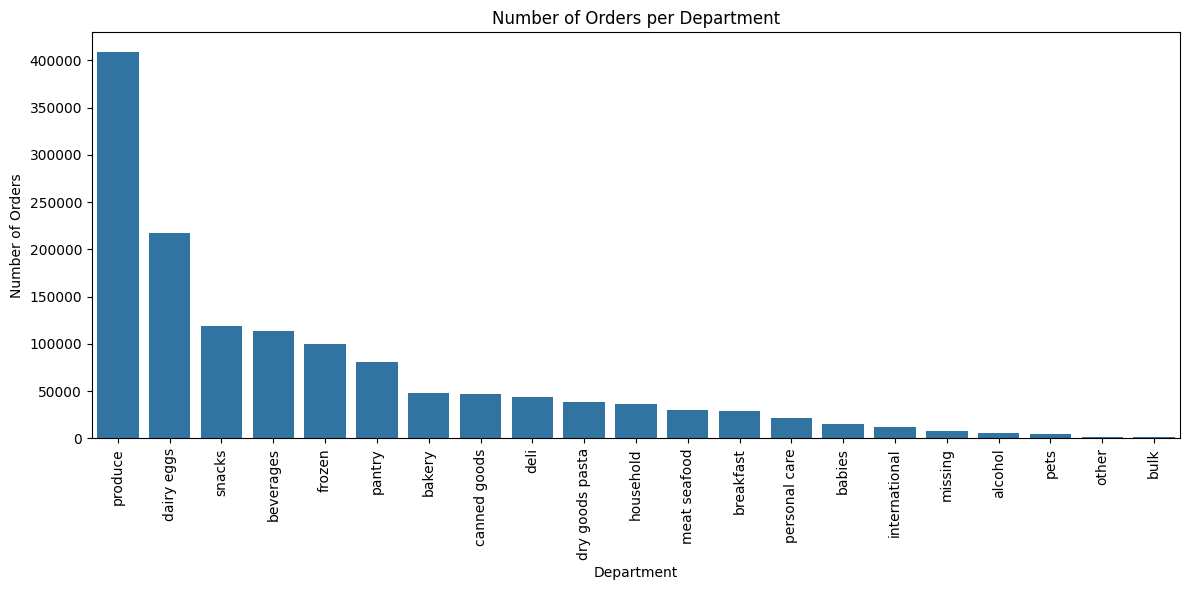

In [16]:
import matplotlib.pyplot as plt
department_orders = order_products_merged['department'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=department_orders.index, y=department_orders.values)
plt.xticks(rotation=90)
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Department')
plt.tight_layout()
plt.show()

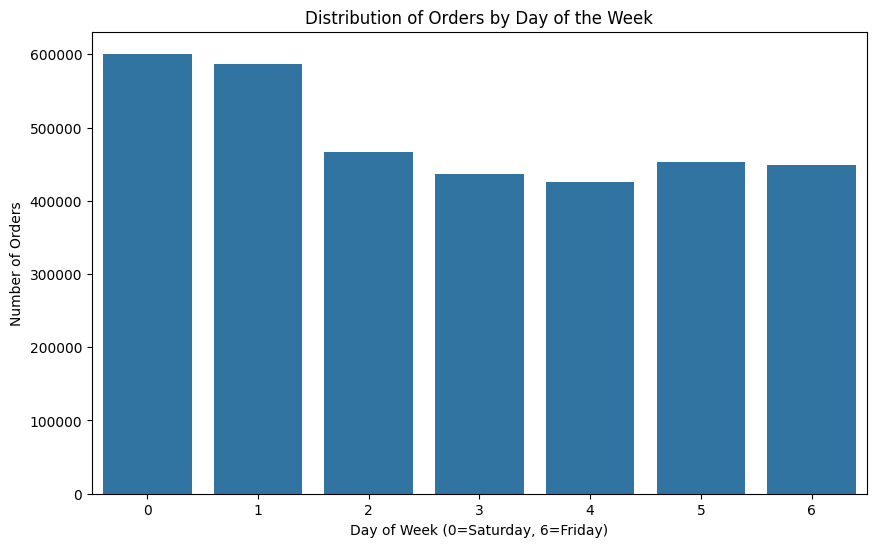

In [17]:
# YOUR CODE HERE
#Plot the distribution of orders by the day of the week.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='order_dow', data=orders)
plt.title('Distribution of Orders by Day of the Week')
plt.xlabel('Day of Week (0=Saturday, 6=Friday)')
plt.ylabel('Number of Orders')
plt.show()

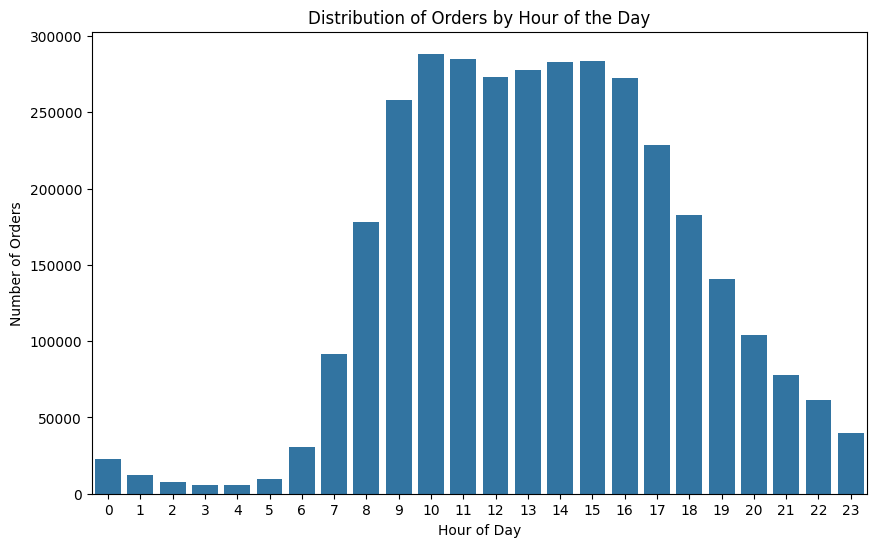

In [18]:
#Plot the distribution of orders by the hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(x='order_hour_of_day', data=orders)
plt.title('Distribution of Orders by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.show()

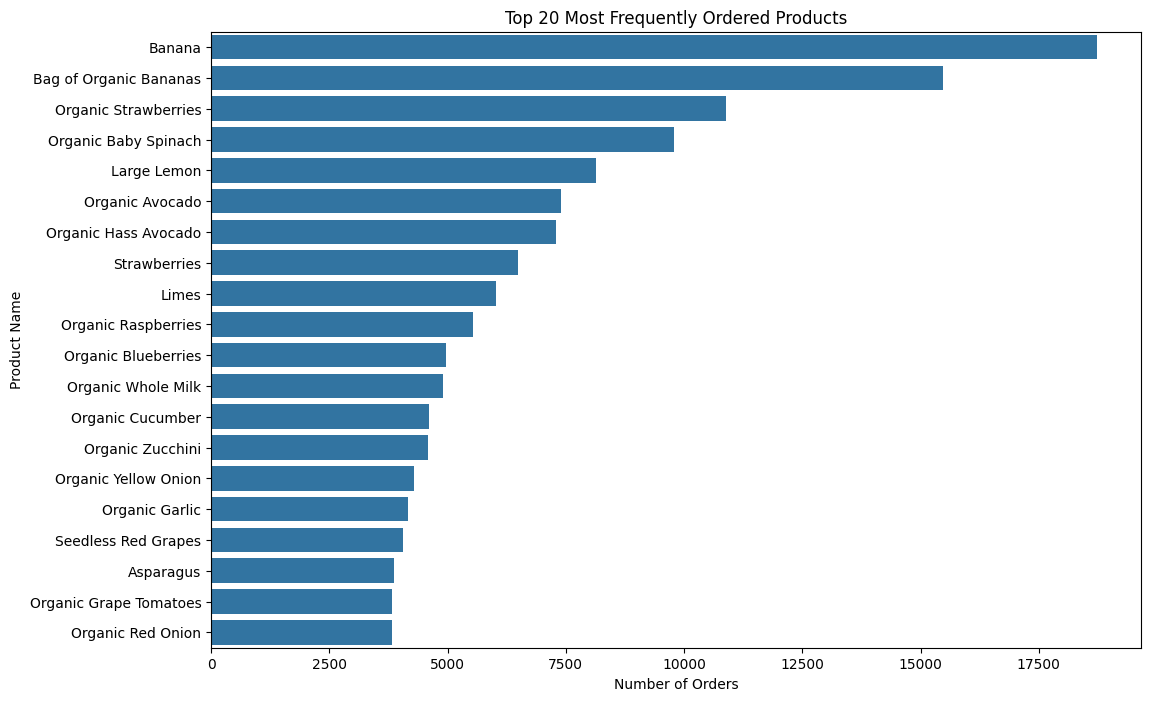

In [19]:
#Find and plot the top 20 most frequently ordered products
top_products = order_products_merged['product_name'].value_counts().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 20 Most Frequently Ordered Products')
plt.xlabel('Number of Orders')
plt.ylabel('Product Name')
plt.show()

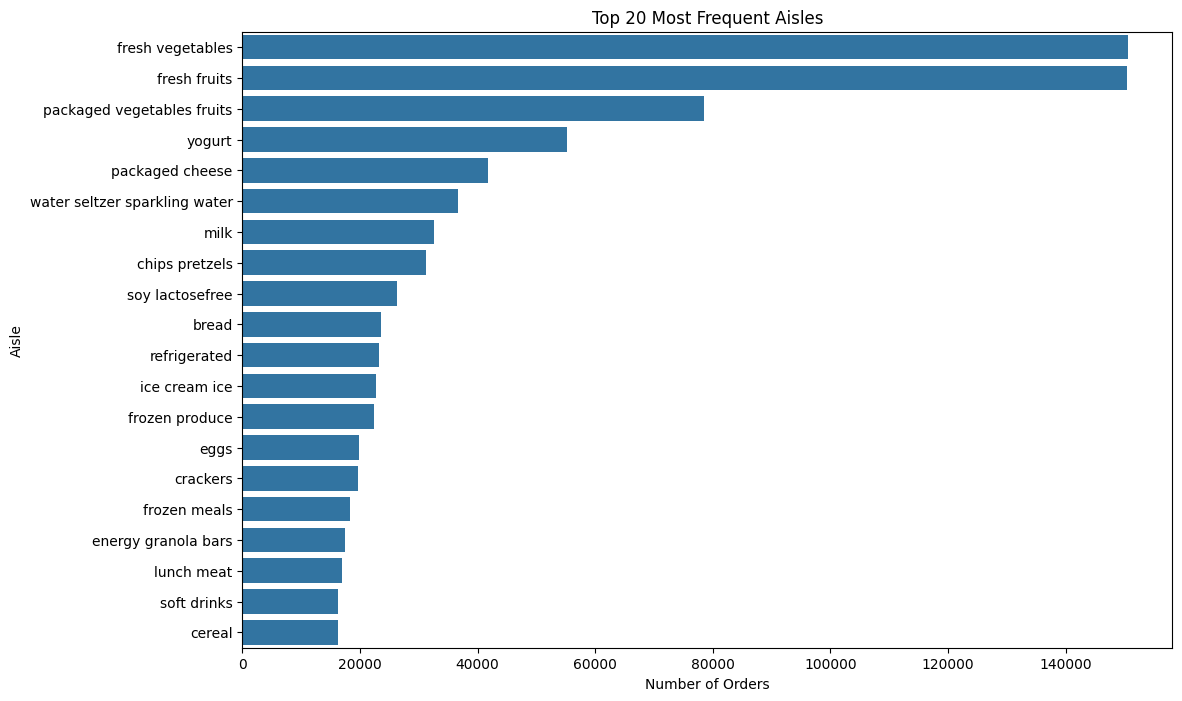

In [20]:
#Find and plot the top 20 most frequent aisles
top_aisles = order_products_merged['aisle'].value_counts().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_aisles.values, y=top_aisles.index)
plt.title('Top 20 Most Frequent Aisles')
plt.xlabel('Number of Orders')
plt.ylabel('Aisle')
plt.show()

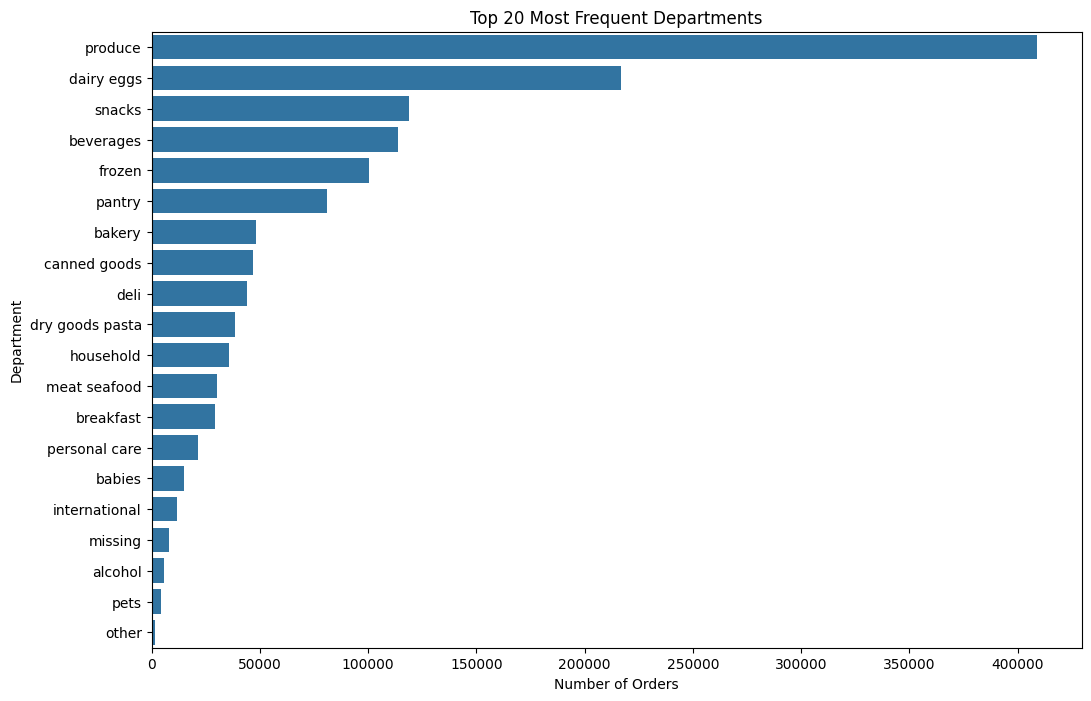

In [21]:
#Find and plot the top 20 most frequent departments
top_departments = order_products_merged['department'].value_counts().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_departments.values, y=top_departments.index)
plt.title('Top 20 Most Frequent Departments')
plt.xlabel('Number of Orders')
plt.ylabel('Department')
plt.show()

Re-order Ratio:
 reordered
1    0.598594
0    0.401406
Name: count, dtype: float64


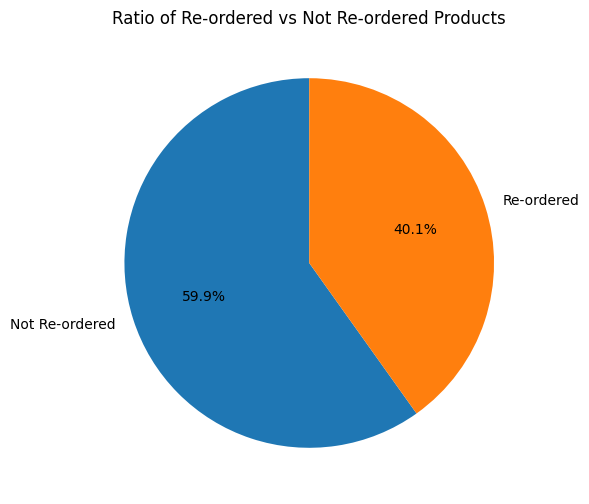

In [22]:
# Find the ratio of Re-ordered and Not Re-ordered products and visualize it

import matplotlib.pyplot as plt
reorder_counts = order_products_merged['reordered'].value_counts()
reorder_ratio = reorder_counts / reorder_counts.sum()

print("Re-order Ratio:\n", reorder_ratio)

plt.figure(figsize=(6, 6))
plt.pie(reorder_counts, labels=['Not Re-ordered', 'Re-ordered'], autopct='%1.1f%%', startangle=90)
plt.title('Ratio of Re-ordered vs Not Re-ordered Products')
plt.show()

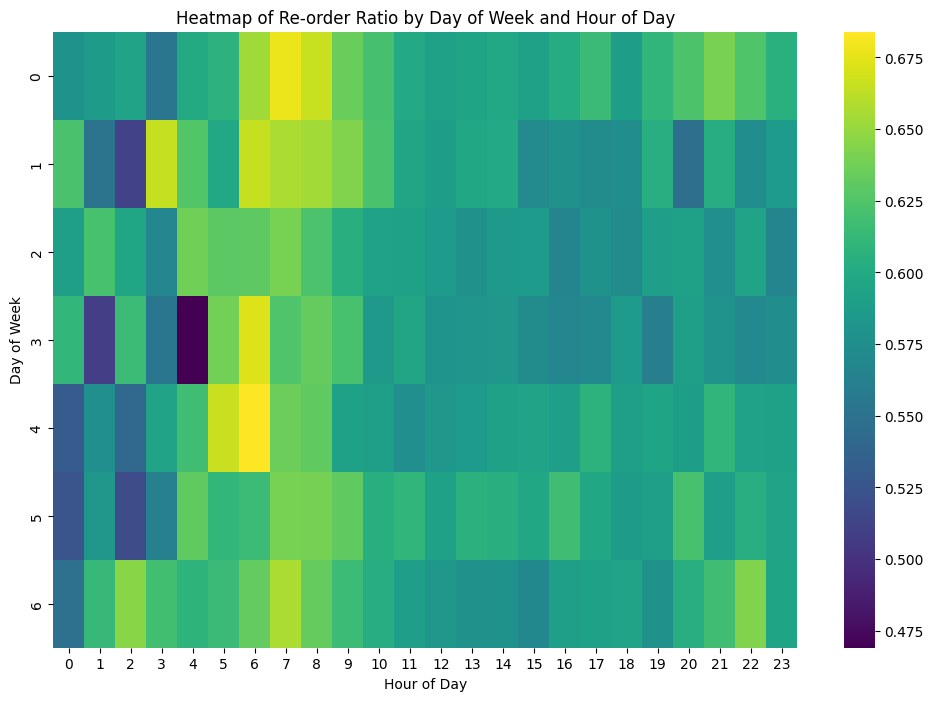

In [23]:
# Plot the heatmap of Re-order ratio of the Day of week vs Hour of day

import matplotlib.pyplot as plt
reorder_day_hour = order_products_merged.groupby(['order_dow', 'order_hour_of_day'])['reordered'].mean().reset_index()
reorder_day_hour_pivot = reorder_day_hour.pivot(index='order_dow', columns='order_hour_of_day', values='reordered')

plt.figure(figsize=(12, 8))
sns.heatmap(reorder_day_hour_pivot, cmap='viridis')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.title('Heatmap of Re-order Ratio by Day of Week and Hour of Day')
plt.show()

## **Stage 2:** Create a basket (4 points)

As the dataset contains huge amount of data, let us take a subset of the data to extract the association rules from it.

**Assumption:** Segment the data by considering the 100 most frequent ordered items. Please note it is just an assumption. You can consider 'n' frequent order items as per your choice.

**Hint:**

- Drop the unwanted columns

- Find the frequencies of orders based on the products and  consider the 100 most frequent order items.

    **Hint:** Count the frequencies of orders for each product_id using `groupby()` and `count()` respectively

- Extract the records of 100 most frequent items (which are extracted in previous step) from combined dataframe.

- Create a Pivot table with `order_id` as index and `product_name` as columns and `reorder` as values.

    - set the `order_id` as index using set_index()
    - fill all the nan values with 0

- After performing the above step, there are a lot of zeros in the data, make sure that any positive values are converted to a 1 and anything less than 0 is set to 0.


In [29]:
# YOUR CODE HERE
# create  new dataframe  by considering the 100 most frequent ordered items.

# Get the top 100 most frequent products
top_100_products = order_products_merged['product_name'].value_counts().head(100).index

# Filter the original dataframe to include only orders with the top 100 products
df_top_100 = order_products_merged[order_products_merged['product_name'].isin(top_100_products)]

# Create the basket pivot table
basket = df_top_100.pivot_table(index='order_id', columns='product_name', values='reordered', aggfunc='sum').fillna(0)

# Convert quantities to 0/1
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_encoded = basket.map(encode_units)

In [30]:
basket.head()

product_name,100% Whole Wheat Bread,2% Reduced Fat Milk,Apple Honeycrisp Organic,Asparagus,Bag of Organic Bananas,Banana,Blueberries,Boneless Skinless Chicken Breasts,Broccoli Crown,Bunched Cilantro,...,Sparkling Lemon Water,Sparkling Natural Mineral Water,Sparkling Water Grapefruit,Spring Water,Strawberries,Uncured Genoa Salami,Unsalted Butter,Unsweetened Almondmilk,Unsweetened Original Almond Breeze Almond Milk,Yellow Onions
order_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## **Stage 3:** Apply Apriori algorithm (2 points)

- As the dataset contains huge amount of data, let us take a subset of the data to extract the association rules from it.

  **Assumption:** Segment the basket by considering 100000 records. Please note its just an assumption, you can consider 'n'  records as per your choice.

  **Hint:** [apriori](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.frequent_patterns/)

- Find the association rules and make a dataframe

In [31]:
# YOUR CODE HERE
from mlxtend.frequent_patterns import apriori

# Since the dataset is large, we'll use a small subset for demonstration
subset_basket = basket_encoded.sample(n=10000, random_state=42)

frequent_itemsets = apriori(subset_basket, min_support=0.01, use_colnames=True)

print("Frequent Itemsets:")
print(frequent_itemsets.head())

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
   support                    itemsets
0   0.0170    (100% Whole Wheat Bread)
1   0.0136       (2% Reduced Fat Milk)
2   0.0165  (Apple Honeycrisp Organic)
3   0.0244                 (Asparagus)
4   0.1395    (Bag of Organic Bananas)


In [34]:
#Generate association rules from the frequent itemsets.
#We'll generate rules with a minimum lift of 1.

from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print("\nAssociation Rules:")
print(rules.head())


Association Rules:
                antecedents               consequents  antecedent support  \
0  (Bag of Organic Bananas)    (Organic Baby Spinach)              0.1395   
1    (Organic Baby Spinach)  (Bag of Organic Bananas)              0.0894   
2  (Bag of Organic Bananas)    (Organic Hass Avocado)              0.1395   
3    (Organic Hass Avocado)  (Bag of Organic Bananas)              0.0600   
4  (Bag of Organic Bananas)     (Organic Raspberries)              0.1395   

   consequent support  support  confidence      lift  representativity  \
0              0.0894   0.0192    0.137634  1.539535               1.0   
1              0.1395   0.0192    0.214765  1.539535               1.0   
2              0.0600   0.0190    0.136201  2.270012               1.0   
3              0.1395   0.0190    0.316667  2.270012               1.0   
4              0.0417   0.0143    0.102509  2.458248               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski 

In [35]:
rules.sort_values(by=['confidence', 'lift'], ascending=False, inplace=True)

print("\nTop 10 Association Rules:")
print(rules.head(10))


Top 10 Association Rules:
               antecedents               consequents  antecedent support  \
8       (Honeycrisp Apple)                  (Banana)              0.0281   
5    (Organic Raspberries)  (Bag of Organic Bananas)              0.0417   
3   (Organic Hass Avocado)  (Bag of Organic Bananas)              0.0600   
12       (Organic Avocado)                  (Banana)              0.0686   
30   (Organic Raspberries)    (Organic Strawberries)              0.0417   
19          (Strawberries)                  (Banana)              0.0529   
7   (Organic Strawberries)  (Bag of Organic Bananas)              0.0899   
10           (Large Lemon)                  (Banana)              0.0644   
21                 (Limes)             (Large Lemon)              0.0441   
1   (Organic Baby Spinach)  (Bag of Organic Bananas)              0.0894   

    consequent support  support  confidence      lift  representativity  \
8               0.1710   0.0103    0.366548  2.143556        

In [38]:
rules_df = pd.DataFrame(rules)
rules_df.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
8,(Honeycrisp Apple),(Banana),0.0281,0.1710,0.0103,0.366548,2.143556,1.0,0.005495,1.308702,0.548910,0.054555,0.235884,0.213391
5,(Organic Raspberries),(Bag of Organic Bananas),0.0417,0.1395,0.0143,0.342926,2.458248,1.0,0.008483,1.309593,0.619019,0.085680,0.236404,0.222717
3,(Organic Hass Avocado),(Bag of Organic Bananas),0.0600,0.1395,0.0190,0.316667,2.270012,1.0,0.010630,1.259268,0.595185,0.105263,0.205888,0.226434
12,(Organic Avocado),(Banana),0.0686,0.1710,0.0205,0.298834,1.747566,1.0,0.008769,1.182316,0.459282,0.093565,0.154202,0.209358
30,(Organic Raspberries),(Organic Strawberries),0.0417,0.0899,0.0122,0.292566,3.254349,1.0,0.008451,1.286480,0.722862,0.102178,0.222685,0.214136
19,(Strawberries),(Banana),0.0529,0.1710,0.0153,0.289225,1.691374,1.0,0.006254,1.166332,0.431596,0.073346,0.142612,0.189349
7,(Organic Strawberries),(Bag of Organic Bananas),0.0899,0.1395,0.0250,0.278087,1.993453,1.0,0.012459,1.191971,0.547586,0.122309,0.161054,0.228649
10,(Large Lemon),(Banana),0.0644,0.1710,0.0172,0.267081,1.561876,1.0,0.006188,1.131093,0.384506,0.078827,0.115900,0.183833
21,(Limes),(Large Lemon),0.0441,0.0644,0.0110,0.249433,3.873185,1.0,0.008160,1.246524,0.776038,0.112821,0.197769,0.210120
1,(Organic Baby Spinach),(Bag of Organic Bananas),0.0894,0.1395,0.0192,0.214765,1.539535,1.0,0.006729,1.095850,0.384860,0.091559,0.087467,0.176200


The output of the sorted rules will show us which products are frequently bought together. For example, a rule like {Organic Hass Avocado} -> {Organic Strawberries} with high confidence and lift suggests that customers who buy organic avocados are very likely to also buy organic strawberries.

Based on these rules, a business could:

Create Bundles and Promotions: Offer discounts on bundles of frequently associated products to increase sales. For example, a "Fresh & Fruity" bundle with organic avocados and strawberries.

Optimize Store Layout: Place associated items close to each other in the physical or online store to encourage impulse buys.

Targeted Marketing: Create marketing campaigns that target customers who have bought one item in an association with ads for the other item(s).

Inventory Management: Ensure that associated items are well-stocked, especially when one of them is on promotion.

### Confidence

**What it is:** Confidence is a measure of how often two items are purchased together, given that one of them has already been purchased. It's a conditional probability.

**Formula:** For an association rule "If a customer buys Item A, then they will buy Item B," the confidence is calculated as:

```
Confidence(A -> B) = (Number of transactions containing both A and B) / (Number of transactions containing A)
```

**Example:** If 100 transactions include "bread," and 20 of those transactions also include "butter," then the confidence of the rule "If bread, then butter" is 20/100, or 20%.

**What it tells you:** Confidence tells you the reliability of an association. A high confidence suggests that the presence of item A is a strong indicator that item B will also be in the basket.

### Lift

**What it is:** Lift measures how much more likely two items are to be purchased together than if they were purchased independently. It accounts for the individual popularity of each item.

**Formula:** The lift of an association rule "If A, then B" is calculated as:

```
Lift(A -> B) = Confidence(A -> B) / (Support of B)
```

Where the "Support of B" is the proportion of all transactions that contain item B.

Another way to express this is:

```
Lift(A -> B) = (Support of A and B) / (Support of A * Support of B)
```

**What it tells you:**

  * **Lift \> 1:** This indicates a positive association. The items are more likely to be bought together than if there were no relationship between them. The higher the lift, the stronger the association.
  * **Lift = 1:** There is no association between the items. The purchase of item A has no effect on the purchase of item B.
  * **Lift \< 1:** This indicates a negative association. The items are less likely to be bought together than if there were no relationship. This might suggest they are substitutes for each other.

### Key Difference and Why Both are Important

The key difference is that **lift takes into account the popularity of the second item (the "consequent"), while confidence does not.**

Here's why that's important:

Imagine a very popular item, like milk. Milk is in a high percentage of all transactions. If we have a rule "If bread, then milk," the confidence might be high simply because milk is so popular.

However, lift will tell us if people who buy bread are *more* likely to buy milk than the average customer. If the lift is close to 1, it means that buying bread doesn't really change the probability of buying milk—the association is weak. If the lift is significantly greater than 1, it tells us there's a real, meaningful relationship between the two.

In summary:

  * **Use confidence** to measure the reliability of a rule.
  * **Use lift** to measure the strength and significance of a rule, and to avoid being misled by the popularity of an item.